# Proyek Klasifikasi Kanker Payudara

Proyek ini bertujuan untuk menganalisis dan mengklasifikasikan data kanker payudara menggunakan beberapa algoritma machine learning. Dataset yang digunakan berasal dari UCI Machine Learning Repository: Breast Cancer Wisconsin (Diagnostic) Data Set dengan link : https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data . Tujuan utama dari proyek ini adalah untuk mengklasifikasikan tumor sebagai **Malignant (ganas)** atau **Benign (jinak)** berdasarkan beberapa fitur medis yang tersedia. Model yang digunakan meliputi beberapa algoritma, dan evaluasi dilakukan dengan akurasi serta laporan klasifikasi.

# Langkah 1: Setup Kaggle API

Pada tahap ini, kita perlu mengautentikasi dan mengonfigurasi Kaggle API untuk mengunduh dataset. Kita akan mengunggah file `kaggle.json`, yang berisi kredensial yang diperlukan untuk mengakses dataset dari Kaggle.

In [2]:
from google.colab import files

uploaded = files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

Saving kaggle.json to kaggle.json
kaggle.json


# Langkah 2: Mengunduh Dataset dari Kaggle

Setelah setup Kaggle API selesai, langkah berikutnya adalah mengunduh dataset "Breast Cancer Wisconsin (Diagnostic)" dari Kaggle dan mengekstraknya. Dataset ini akan digunakan untuk analisis dan pemodelan.


In [3]:
# Mendownload dataset menggunakan Kaggle API
!kaggle datasets download -d uciml/breast-cancer-wisconsin-data

# Mengekstrak file zip yang telah diunduh
!unzip breast-cancer-wisconsin-data.zip

Dataset URL: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data
License(s): CC-BY-NC-SA-4.0
  0% 0.00/48.6k [00:00<?, ?B/s]
100% 48.6k/48.6k [00:00<00:00, 2.32MB/s]
Archive:  breast-cancer-wisconsin-data.zip
  inflating: data.csv                


# Langkah 3: Mengimpor Library yang Diperlukan

Pada langkah ini, kita mengimpor library yang diperlukan untuk analisis data, visualisasi, dan machine learning.
- **Pandas** digunakan untuk memanipulasi dan menganalisis data.
- **NumPy** digunakan untuk perhitungan numerik.
- **Seaborn dan Matplotlib** digunakan untuk visualisasi.
- **Scikit-learn** digunakan untuk pemodelan machine learning.
- **EllipticEnvelope** digunakan untuk mendeteksi dan menangani pencilan secara statistik.
- **SMOTE** digunakan untuk mengatasi masalah ketidakseimbangan kelas dalam dataset.


In [4]:
!pip install imblearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.covariance import EllipticEnvelope
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
import joblib
import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

# Langkah 4: Memuat dan Mengeksplorasi Data

Setelah dataset diunduh, kita akan memuat data ke dalam dataframe Pandas dan mengeksplorasi struktur dasar dataset, termasuk dimensi, tipe data, serta melihat beberapa baris pertama. Kita juga akan menghapus kolom yang tidak relevan seperti 'Unnamed: 32' dan 'id'.

In [9]:
# Memuat dataset
data_breast = pd.read_csv('data.csv')

# Cek dimensi dataset
print(f'Dimensi dataset: {data_breast.shape}')

# Tampilkan informasi dataset
data_breast.info()

# Tampilkan beberapa baris pertama
data_breast.head()

# Hapus kolom yang tidak diperlukan
data_breast = data_breast.drop(columns=['Unnamed: 32', 'id'], axis=1)

# Tampilkan informasi dataset setelah menghapus kolom yang tidak diperlukan
data_breast.info()
data_breast.describe()

Dimensi dataset: (569, 33)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14 

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Selanjutnya, pencilan akan dideteksi dan dihapus menggunakan **EllipticEnvelope**.
- **EllipticEnvelope** digunakan untuk mendeteksi pencilan berdasarkan asumsi distribusi Gaussian multivariat.
- Data dengan pencilan akan dihapus agar tidak mempengaruhi model yang akan dilatih.

In [10]:
numerical_features = data_breast.select_dtypes(include=['float64', 'int64']).columns

# Menggunakan EllipticEnvelope untuk mendeteksi dan menangani pencilan
outlier_detector = EllipticEnvelope(contamination=0.01)

# Menghapus pencilan berdasarkan fitur numerik
for feature in numerical_features:
    feature_data = data_breast[[feature]].values
    mask = outlier_detector.fit_predict(feature_data)
    data_breast = data_breast[mask == 1]

print(f"Ukuran dataset setelah pencilan dihapus: {data_breast.shape}")

Ukuran dataset setelah pencilan dihapus: (406, 31)


# Langkah 5: Visualisasi Data (Distribusi Kelas dan Box Plot)
Pada langkah ini, kita memvisualisasikan distribusi target kelas 'diagnosis' serta distribusi fitur numerik dengan **box plot**.

- **Countplot** digunakan untuk memvisualisasikan distribusi target antara kategori Malignant dan Benign.
- **Boxplot** digunakan untuk memeriksa distribusi fitur numerik setelah pencilan dihapus.

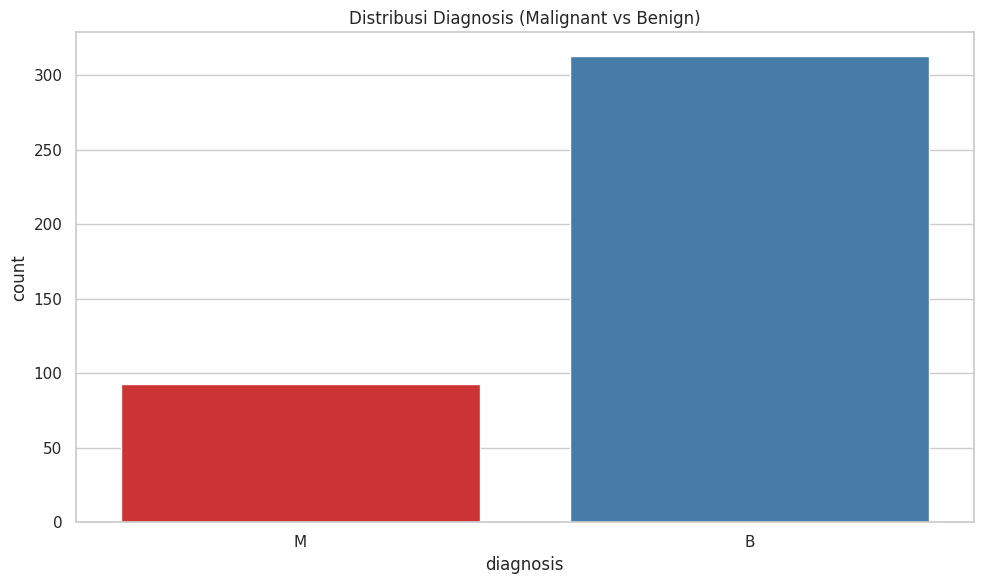

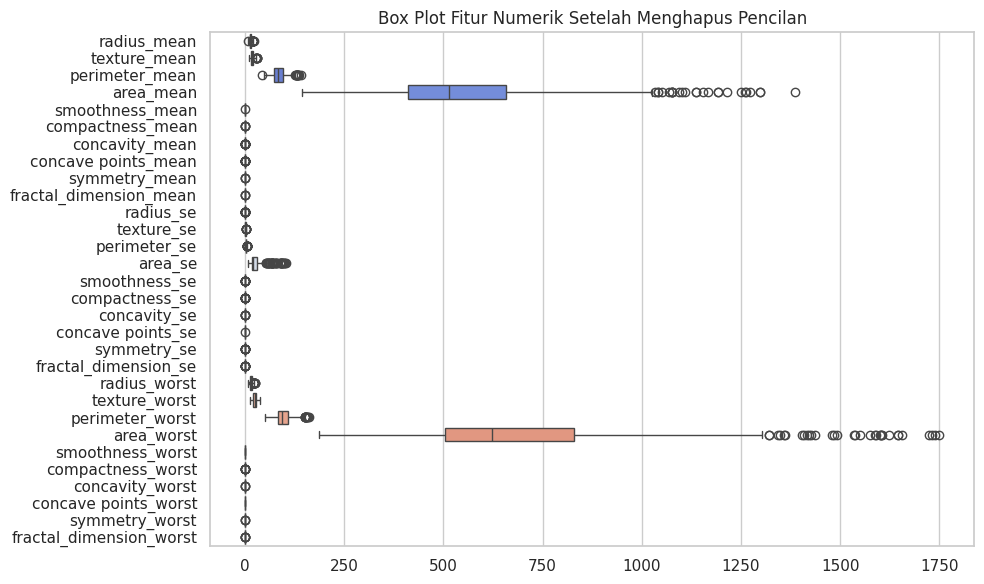

In [11]:
# Visualisasi distribusi diagnosis
plt.figure(figsize=(10, 6))
sns.countplot(x='diagnosis', data=data_breast, palette='Set1')
plt.title('Distribusi Diagnosis (Malignant vs Benign)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))

# Visualisasi boxplot fitur numerik
sns.boxplot(data=data_breast[numerical_features], orient="h", palette="coolwarm")
plt.title('Box Plot Fitur Numerik Setelah Menghapus Pencilan')
plt.tight_layout()
plt.show()


# Langkah 6: Encoding Kolom Target dan Analisis Korelasi
Pada tahap ini, kita mengonversi kolom 'diagnosis' menjadi nilai numerik agar bisa digunakan dalam model machine learning.
- **M (Malignant)** dikonversi menjadi **1**, dan **B (Benign)** dikonversi menjadi **0**.
- **Matriks korelasi** divisualisasikan untuk melihat hubungan antar fitur dalam dataset.

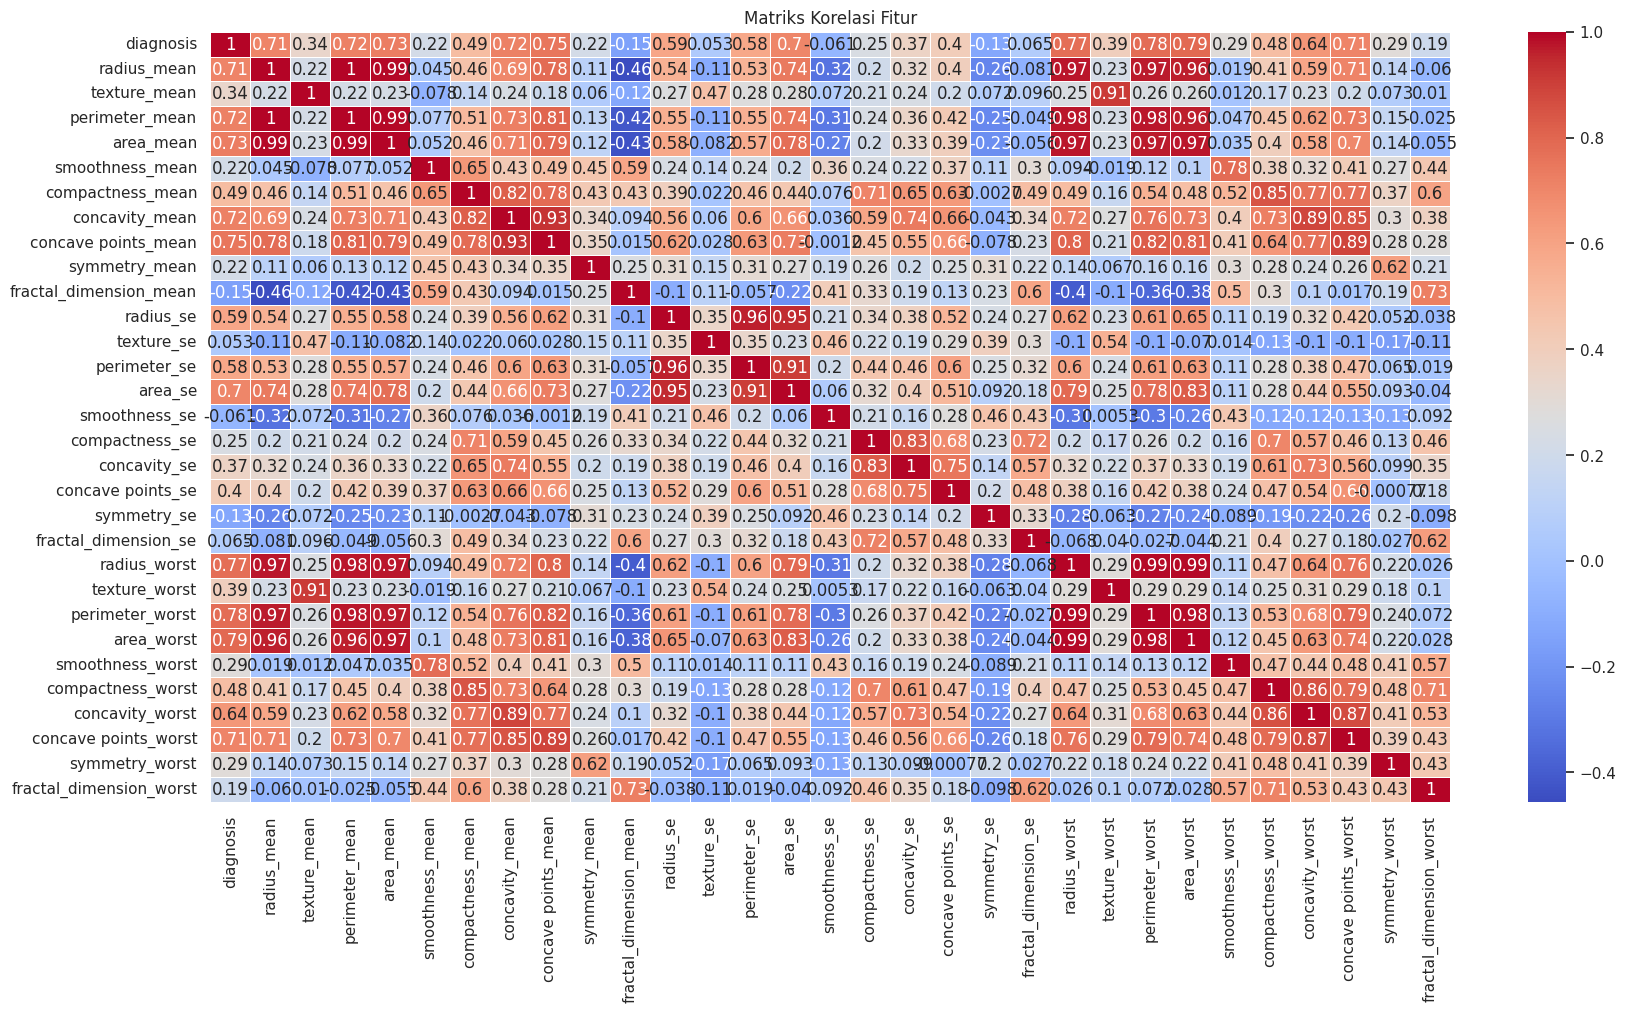

In [12]:
# Mengonversi kolom 'diagnosis' menjadi numerik (M -> 1, B -> 0)
data_breast['diagnosis'] = data_breast['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)

# Matriks korelasi
plt.figure(figsize=(20, 10))
correlation_matrix = data_breast.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Matriks Korelasi Fitur")
plt.show()

# Langkah 7: Memisahkan Variabel Fitur dan Target
Pada langkah ini, kita memisahkan variabel fitur (X) dan variabel target (y) dari dataset. Variabel fitur adalah semua kolom kecuali kolom 'diagnosis', yang merupakan label untuk klasifikasi.

In [13]:
X = data_breast.drop(['diagnosis'], axis=1)
y = data_breast['diagnosis']

# Langkah 8: Memeriksa Unique Class Labels di Target
Kita perlu memeriksa kelas unik yang ada di variabel target (y) untuk memastikan bahwa dataset memiliki lebih dari satu kelas. Ini penting untuk memastikan bahwa model dapat dilatih dengan baik.

In [14]:
unique_classes = np.unique(y)
print(f"Unique class labels in y: {unique_classes}")

Unique class labels in y: [0 1]


# Langkah 9: Memeriksa Distribusi Kelas di y_train
Setelah membagi dataset, kita memeriksa distribusi kelas di data pelatihan (y_train) untuk melihat apakah kita memiliki proporsi yang seimbang antara kelas yang ada.

In [15]:
# Membagi dataset menjadi 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("Distribusi kelas di y_train:")
print(y_train.value_counts())

Distribusi kelas di y_train:
diagnosis
0    225
1     59
Name: count, dtype: int64


# Langkah 10: Menggunakan SMOTE untuk Oversampling
Sebelum menerapkan SMOTE (Synthetic Minority Over-sampling Technique), kita memeriksa apakah ada lebih dari satu kelas dalam y_train. Jika ada, kita menggunakan SMOTE untuk menyeimbangkan kelas dengan membuat contoh sintetis dari kelas minoritas. Jika SMOTE diterapkan, kita akan melihat distribusi kelas di y_train_balanced untuk memastikan bahwa kelas sudah seimbang setelah proses oversampling.

In [16]:
# Memastikan ada lebih dari satu kelas
if len(np.unique(y_train)) > 1:
    smote = SMOTE(random_state=42)
    X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

    # Melihat Distribusi Kelas Setelah Oversampling
    print("Distribusi kelas setelah SMOTE:")
    print(pd.Series(y_train_balanced).value_counts())
else:
    print("Hanya ada satu kelas di y_train, tidak ada SMOTE yang diterapkan.")

Distribusi kelas setelah SMOTE:
diagnosis
0    225
1    225
Name: count, dtype: int64


# Langkah 11: Normalisasi Data

Pada langkah ini, data fitur dinormalisasi menggunakan **StandardScaler** agar setiap fitur berada dalam skala yang sama. Ini penting untuk model seperti SVM dan KNN yang sensitif terhadap skala data.

In [17]:
# Normalisasi fitur menggunakan StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Distribusi kelas di y_train:")
print(y_train.value_counts())
print("\nDistribusi kelas di y_test:")
print(y_test.value_counts())

Distribusi kelas di y_train:
diagnosis
0    225
1     59
Name: count, dtype: int64

Distribusi kelas di y_test:
diagnosis
0    88
1    34
Name: count, dtype: int64


# Langkah 12: Melatih Berbagai Model dan Memilih Model Terbaik
Pada langkah ini, berbagai model machine learning dilatih menggunakan set pelatihan yang telah dinormalisasi. Model yang digunakan meliputi:
- **Support Vector Classifier**
- **K-Nearest Neighbors**
- **Decision Tree**

Setiap model dievaluasi berdasarkan akurasi pada set pengujian, dan model dengan akurasi tertinggi dipilih sebagai model terbaik.

In [18]:
# Definisikan model yang akan digunakan
models = {
    'Support Vector Classifier': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree Classifier': DecisionTreeClassifier()
}

# Inisialisasi dictionary untuk menyimpan hasil
results = {}

# Melatih dan mengevaluasi tiap model
for model_name, model in models.items():
    # Melatih model
    model.fit(X_train_scaled, y_train)

    # Prediksi dengan model
    y_pred = model.predict(X_test_scaled)

    # Menghitung akurasi
    acc = accuracy_score(y_test, y_pred)*100
    results[model_name] = acc

    # Menampilkan hasil
    print(f"\n### {model_name} ###")
    print(f"Accuracy: {acc:.2f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

# Menampilkan hasil akurasi
for model_name, acc in results.items():
    print(f"{model_name}: Akurasi = {acc:.2f}")



### Support Vector Classifier ###
Accuracy: 98.36
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        88
           1       1.00      0.94      0.97        34

    accuracy                           0.98       122
   macro avg       0.99      0.97      0.98       122
weighted avg       0.98      0.98      0.98       122


### K-Nearest Neighbors ###
Accuracy: 95.08
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        88
           1       1.00      0.82      0.90        34

    accuracy                           0.95       122
   macro avg       0.97      0.91      0.94       122
weighted avg       0.95      0.95      0.95       122


### Decision Tree Classifier ###
Accuracy: 95.08
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        88
           1       0.9

# Langkah 13: Visualisasi Hasil Akurasi Model

Pada langkah ini, kita memvisualisasikan akurasi model yang dilatih menggunakan **bar plot**. Ini membantu kita membandingkan performa masing-masing model.

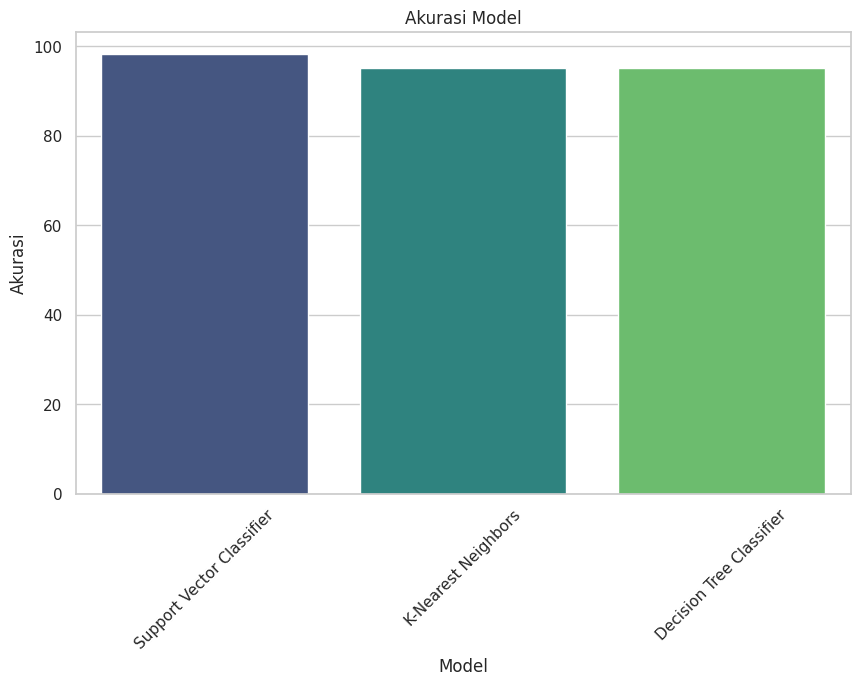

In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette="viridis")
plt.title("Akurasi Model")
plt.ylabel("Akurasi")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.show()

# Langkah 14: Menyimpan Model Terbaik

Setelah model terbaik dipilih, model disimpan menggunakan **joblib** agar dapat digunakan kembali di masa depan tanpa perlu melatih ulang.

In [20]:
import joblib

# Mencari model dengan akurasi tertinggi
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]

# Menyimpan model terbaik
joblib.dump(best_model, 'model_terbaik.pkl')
print("Model terbaik telah disimpan!")

Model terbaik telah disimpan!


# Langkah 15: Menguji Model Terbaik
Pada langkah ini, kita akan memuat model terbaik yang telah disimpan dan mengujinya kembali menggunakan data pengujian untuk memastikan bahwa model tersebut bekerja dengan baik setelah disimpan. Pengujian ini dilakukan dengan melakukan prediksi pada data uji yang telah disiapkan, kemudian menampilkan hasil akurasi dan classification report untuk evaluasi performa model.

In [21]:
# Memuat model terbaik dari file
best_model_loaded = joblib.load('model_terbaik.pkl')

# Melakukan prediksi menggunakan data uji
y_pred_loaded = best_model_loaded.predict(X_test_scaled)

# Menghitung akurasi model yang di-load
acc_loaded = accuracy_score(y_test, y_pred_loaded)

# Menampilkan akurasi dan laporan klasifikasi
print(f"Accuracy of the loaded model: {acc_loaded:.4f}")
print("Classification Report of the loaded model:")
print(classification_report(y_test, y_pred_loaded))

Accuracy of the loaded model: 0.9836
Classification Report of the loaded model:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        88
           1       1.00      0.94      0.97        34

    accuracy                           0.98       122
   macro avg       0.99      0.97      0.98       122
weighted avg       0.98      0.98      0.98       122



# Langkah 16: Menampilkan Hasil Pengujian
Pada langkah terakhir ini, kita menampilkan hasil pengujian dari model yang telah diload dengan beberapa metrik penting seperti akurasi, precision, recall, dan f1-score untuk setiap kelas (Malignant dan Benign). Selain itu, kita juga menampilkan matriks kebingungan (confusion matrix) untuk melihat distribusi hasil prediksi dibandingkan dengan label yang sebenarnya.

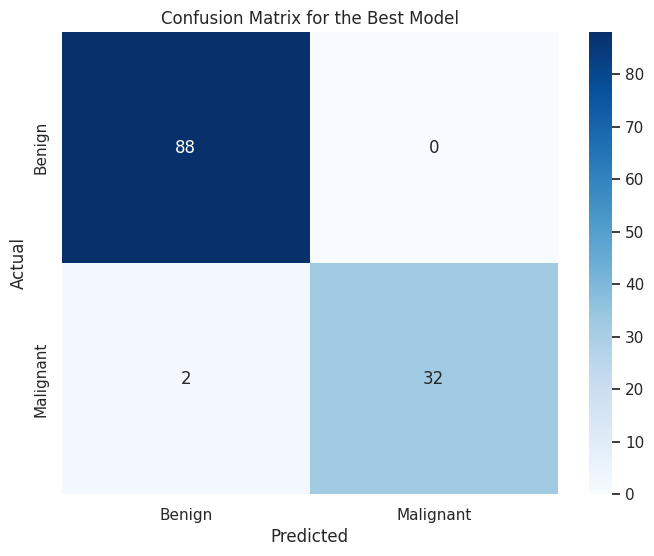

In [22]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_loaded)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for the Best Model')
plt.show()